In [1]:
# 다중회귀분석 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 준비 
df = pd.read_csv('auto-mpg.csv', header=None)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [4]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
# horsepower 자료형 변경(문자열 >> 숫자)

df.horsepower.replace('?', np.nan, inplace=True)
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
# 누락 데이터 삭제 
df.dropna(subset=['horsepower'], axis=0, inplace=True)

In [9]:
# 데이터 타입 변경(문자형 >> 실수)
df.horsepower = df.horsepower.astype('float')

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [13]:
df.shape

(392, 9)

In [14]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [15]:
ndf.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0


In [16]:
x = ndf[['cylinders', 'horsepower','weight']]
y = ndf['mpg']

In [17]:
# 데이터 분리(훈련용, 테스트용)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =\
train_test_split(x, y,
                test_size=0.3,
                random_state=42)

In [18]:
x_train, x_test, x_train.shape, x_test.shape

(     cylinders  horsepower  weight
 110          4        94.0  2379.0
 17           6        85.0  2587.0
 320          4        92.0  2434.0
 24           6        90.0  2648.0
 128          6       100.0  3336.0
 ..         ...         ...     ...
 72           8       150.0  3892.0
 107          6       100.0  2789.0
 272          4        85.0  2855.0
 352          4        65.0  2380.0
 103          8       150.0  4997.0
 
 [274 rows x 3 columns],
      cylinders  horsepower  weight
 79           4        69.0  2189.0
 276          4       115.0  2795.0
 248          4        60.0  1800.0
 56           4        70.0  1955.0
 393          4        86.0  2790.0
 ..         ...         ...     ...
 80           4        86.0  2395.0
 312          4        65.0  2019.0
 357          4       100.0  2615.0
 250          8       140.0  3735.0
 155          6        72.0  3158.0
 
 [118 rows x 3 columns],
 (274, 3),
 (118, 3))

In [19]:
# 다중회귀분석 

from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
# 모델 학습 (Only train data)
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
# test data로 검증, r2(결정계수)

r2 = lr.score(x_test,y_test)

In [23]:
r2
# 결과해석 : 65.16% 모형을 설명 

0.6516756050160637

In [24]:
# 회귀식의 파라미터 (회귀계수, y절편)
lr.coef_ #회귀계수

array([-0.4436757 , -0.05394741, -0.00507997])

In [25]:
lr.intercept_

46.90562407302218

In [26]:
# 회귀식 
# y_hat = -0.4436757 cylinders + -0.05394741 horsepower + -0.00507997 weight + 46.90562407302218

In [27]:
# 예측 (x_test 예측)
lr.predict(x_test)

array([30.28849429, 24.72845121, 32.75012955, 31.42326   , 26.31832598,
       30.13752882, 10.07561818, 29.57873206, 22.53754182, 33.00319304,
       13.54832362, 23.53293565, 12.84569799, 30.0562493 , 19.7458645 ,
       27.15022572, 23.36049705, 29.14693456, 27.25160692, 27.68362263,
       24.72700914, 31.50531854, 31.3787557 , 18.54283809, 31.54446246,
       28.7695209 , 25.30426413, 21.10907285, 32.74339771, 28.27511188,
       12.97877445, 23.08159728, 18.29949811, 27.75309035, 12.58711811,
       31.38190341, 12.24267733, 30.01511092, 13.99018721,  8.31346084,
       15.52533556, 30.37628744, 31.08047109, 29.23909086, 11.7145786 ,
        7.70386437, 22.17636529, 30.58821255, 29.04969829, 31.51469947,
       14.00006676, 28.43374423, 28.77460087, 29.41081263, 23.79974322,
       19.85890148, 21.05941798, 24.04579447, 27.94098708, 28.68774276,
        6.06711662, 23.71659361, 24.32369701, 25.36207607, 27.2297912 ,
       29.48364627, 26.5660291 , 31.51469947, 20.32790222, 10.62

In [28]:
y_hat = lr.predict(x_test)

In [29]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [30]:
y_hat

array([30.28849429, 24.72845121, 32.75012955, 31.42326   , 26.31832598,
       30.13752882, 10.07561818, 29.57873206, 22.53754182, 33.00319304,
       13.54832362, 23.53293565, 12.84569799, 30.0562493 , 19.7458645 ,
       27.15022572, 23.36049705, 29.14693456, 27.25160692, 27.68362263,
       24.72700914, 31.50531854, 31.3787557 , 18.54283809, 31.54446246,
       28.7695209 , 25.30426413, 21.10907285, 32.74339771, 28.27511188,
       12.97877445, 23.08159728, 18.29949811, 27.75309035, 12.58711811,
       31.38190341, 12.24267733, 30.01511092, 13.99018721,  8.31346084,
       15.52533556, 30.37628744, 31.08047109, 29.23909086, 11.7145786 ,
        7.70386437, 22.17636529, 30.58821255, 29.04969829, 31.51469947,
       14.00006676, 28.43374423, 28.77460087, 29.41081263, 23.79974322,
       19.85890148, 21.05941798, 24.04579447, 27.94098708, 28.68774276,
        6.06711662, 23.71659361, 24.32369701, 25.36207607, 27.2297912 ,
       29.48364627, 26.5660291 , 31.51469947, 20.32790222, 10.62

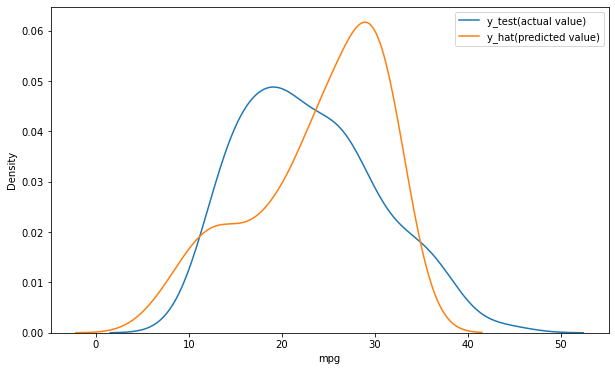

In [37]:
plt.figure(figsize=(10,6))
ax1 = sns.kdeplot(y_test, label='y_test(actual value)')
ax2 = sns.kdeplot(y_hat, label='y_hat(predicted value)', ax=ax1)
plt.legend(loc='best')
plt.show()